In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(123)

# Number of rows in the dataset
n_rows = 30

# Generate random data for the dataset
ages = np.random.randint(20, 65, size=n_rows)
income_mth = np.random.randint(3000, 9000, size=n_rows)
credit_score = np.random.randint(400, 800, size=n_rows)

dict = {
    'age': ages,
    'income_per_mth': income_mth,
    'credit_score': credit_score
}

df = pd.DataFrame(dict)
df

,age,income_per_mth,credit_score
0,22,6252,644
1,48,4382,759
2,54,6937,529
3,58,7309,443
4,37,6702,586
5,39,7958,757
6,62,8531,583
7,42,5338,425
8,53,3588,712
9,52,4704,705


In [27]:
def eligibility(x):
  if x.age > 23 and x.income_per_mth > 3300 and x.credit_score > 600:
    return "Yes"
  else:
    return "No"

df['application_status'] = df.apply(eligibility,axis = 1)

In [28]:
df.application_status.value_counts()

application_status
No     18
Yes    12
Name: count, dtype: int64

In [29]:
print(df)

    age  income_per_mth  credit_score application_status
0    22            6252           644                 No
1    48            4382           759                Yes
2    54            6937           529                 No
3    58            7309           443                 No
4    37            6702           586                 No
5    39            7958           757                Yes
6    62            8531           583                 No
7    42            5338           425                 No
8    53            3588           712                Yes
9    52            4704           705                Yes
10   29            6971           668                Yes
11   52            7202           418                 No
12   52            3837           401                 No
13   45            5624           451                 No
14   39            7939           773                Yes
15   34            4442           633                Yes
16   56            3826        

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop('application_status', axis=1)
y = df['application_status']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=234)

# DT classifier
dt_model = DecisionTreeClassifier(criterion='entropy')

# Train the classifier on the training data
dt_model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = dt_model.predict(X_test)

# Evaluate the model
performance = accuracy_score(y_test, y_pred)
print(f"Accuracy of the RF model is: {performance:.2f}")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

Accuracy of the RF model is: 0.88
              precision    recall  f1-score   support

          No       0.80      1.00      0.89         4
         Yes       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8

[[4 0]
 [1 3]]


In [46]:
X_test

,age,income_per_mth,credit_score
10,29,6971,668
18,36,6862,742
13,45,5624,451
17,52,4418,456
6,62,8531,583
26,27,6226,795
20,23,7242,467
9,52,4704,705


Text(50.722222222222214, 0.5, 'True labels')

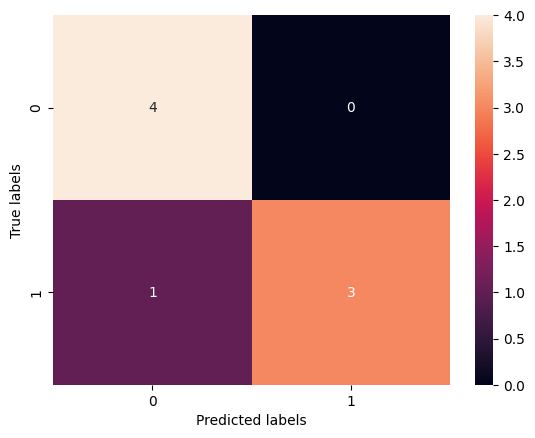

In [47]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred),annot = True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

[Text(0.4, 0.8333333333333334, 'credit_score <= 627.5\nentropy = 0.946\nsamples = 22\nvalue = [14, 8]\nclass = Yes'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = Yes'),
 Text(0.6, 0.5, 'age <= 28.0\nentropy = 0.722\nsamples = 10\nvalue = [2, 8]\nclass = No'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Yes'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = No')]

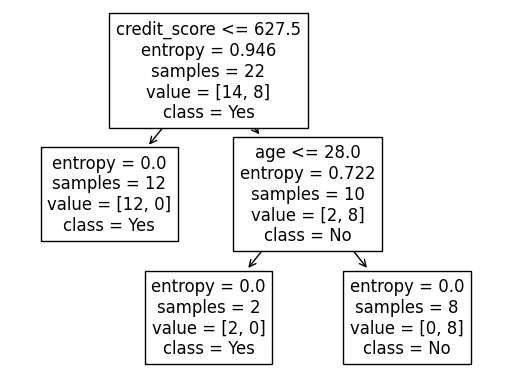

In [51]:
from sklearn import tree
fn = X_train.columns[0:3]
cn = ["Yes","No"]
tree.plot_tree(dt_model,
               class_names=cn,
               feature_names=fn)

In [49]:
fn

Index(['age', 'income_per_mth', 'credit_score'], dtype='object')